## Import Libraries

In [1]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical computing
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Plotting Library

## Load the dataset

In [2]:
df = pd.read_csv(r"C:\DSAI study materials\Job Hunt\Elevate Labs\Project\Sample - Superstore.csv") # Read the dataset

In [3]:
df.head()# Display the first few rows of the dataset

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2.0,0.2,5.55
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.78,3.0,0.2,4.27
2,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3.0,0.2,-64.77
3,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2.0,0.8,-5.49
4,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3.0,0.2,4.88


## Clean and Preprocessing

In [4]:
df['Order_Date'] = pd.to_datetime(df['Order_Date']) # Convert to datetime
df['Ship_Date'] = pd.to_datetime(df['Ship_Date']) # Convert to datetime
df['Processing_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days # Calculate processing days

## Profitability Calculation

In [5]:
df['Marginpct'] = (df['Profit'] / df['Sales']) * 100 # Calculate profit margin percentage

## Correlation analysis (Inventory days vs Profitability)

In [6]:
corr = df[['Processing_Days', 'Marginpct']].corr() # Calculate correlation matrix
print(corr)

                 Processing_Days  Marginpct
Processing_Days         1.000000  -0.011813
Marginpct              -0.011813   1.000000


## Visualization

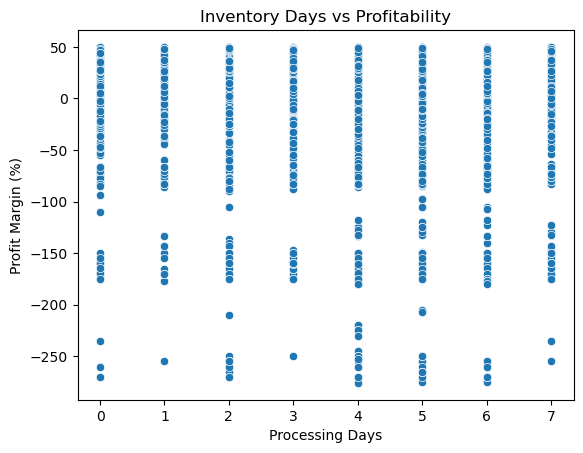

In [7]:
# Scatter Plot
sns.scatterplot(data=df, x='Processing_Days', y='Marginpct') # Scatter plot
plt.title('Inventory Days vs Profitability') # Title
plt.xlabel('Processing Days') # X-axis label
plt.ylabel('Profit Margin (%)') # Y-axis label
plt.show() # Show plot


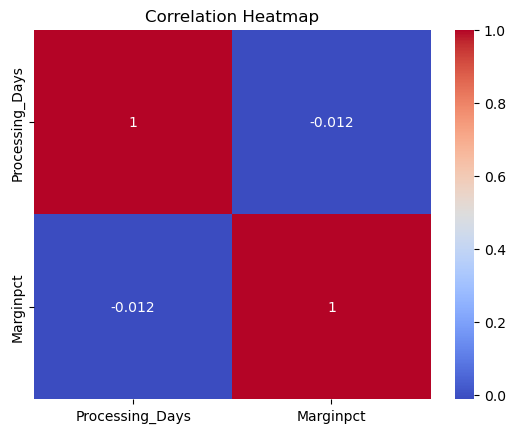

In [8]:
# Correlation Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm') # Heatmap
plt.title('Correlation Heatmap') # Title
plt.show() # Show plot


## Group Analysis

In [9]:
group_corr = df.groupby('Category')[['Processing_Days','Marginpct']].corr().unstack().iloc[:,1]
print(group_corr)


Category
Furniture          0.008347
Office Supplies   -0.022072
Technology         0.017363
Name: (Processing_Days, Marginpct), dtype: float64


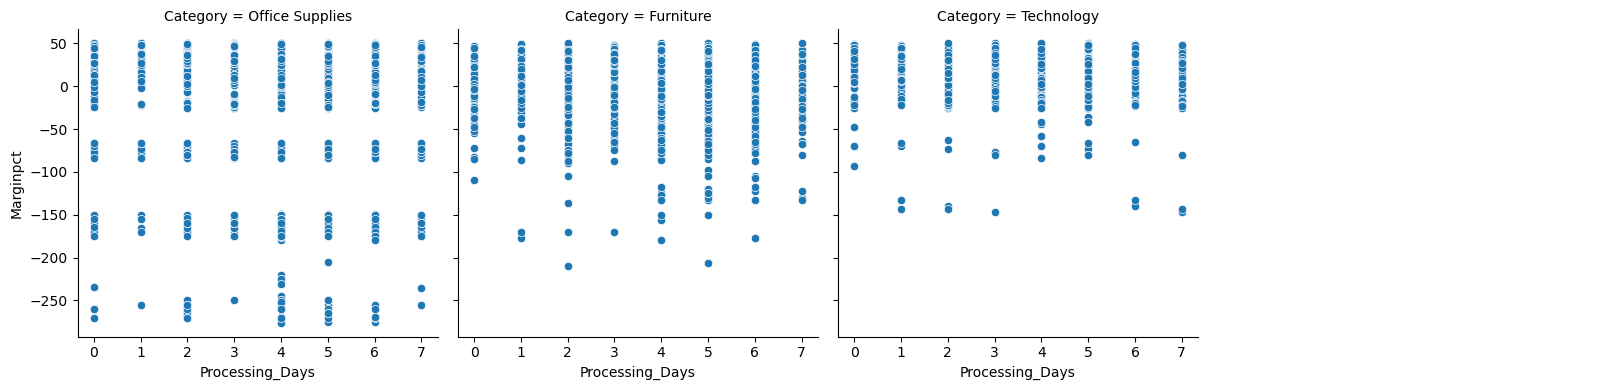

In [10]:
#Scatter Plots by Category

g = sns.FacetGrid(df, col="Category", col_wrap=4, height=4)# Create a grid of plots
g.map(sns.scatterplot, "Processing_Days", "Marginpct") 
g.add_legend()


## Basic Distributions


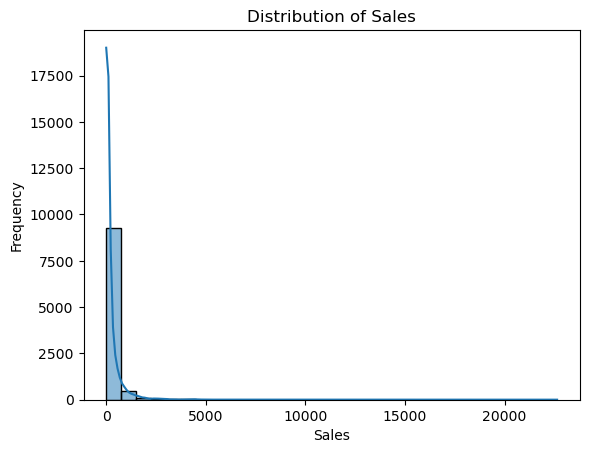

In [11]:
# Distribution of sales
sns.histplot(df['Sales'], bins=30, kde=True) # Histogram
plt.title('Distribution of Sales') # Title
plt.xlabel('Sales') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show() # Show plot

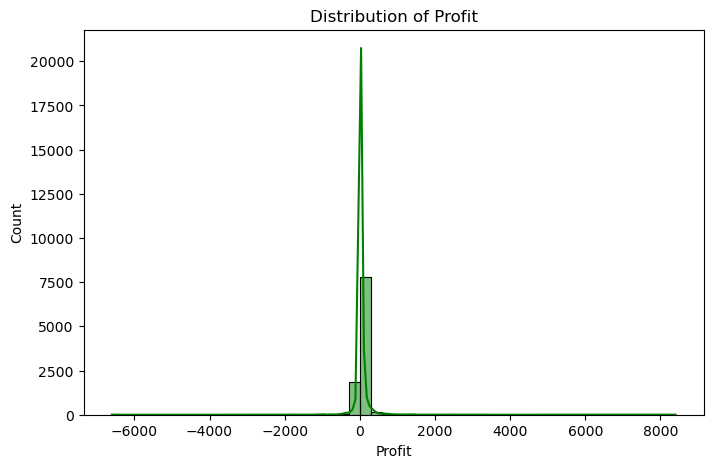

In [15]:
# Distribution of profit
plt.figure(figsize=(8,5))
sns.histplot(df["Profit"], bins=50, kde=True, color="green")
plt.title("Distribution of Profit")
plt.show()

## Category and Sub-Category performance

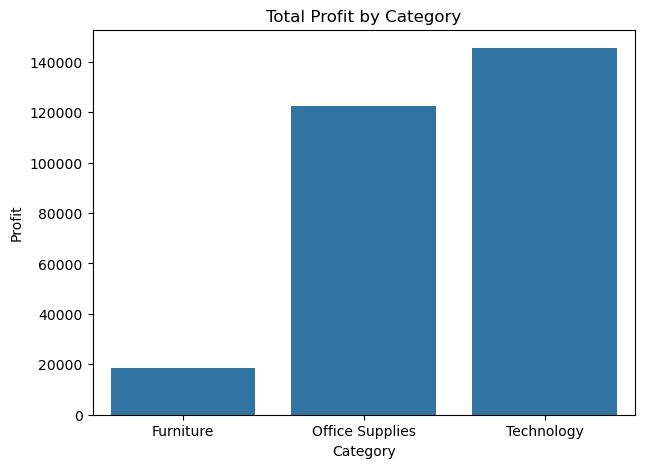

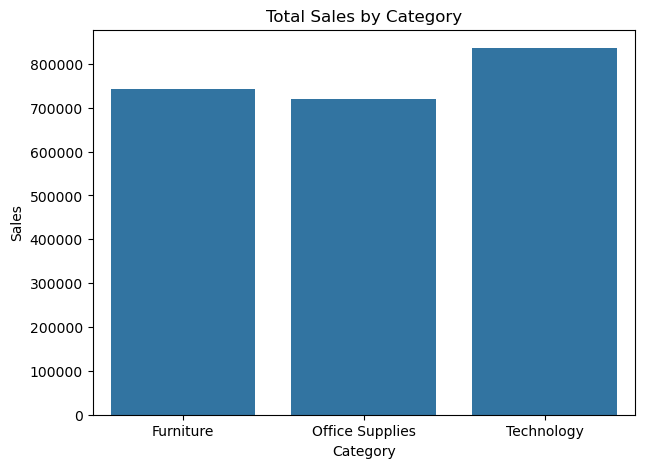

In [17]:
cat_perf = df.groupby("Category")[["Sales","Profit"]].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x="Category", y="Profit", data=cat_perf)
plt.title("Total Profit by Category")
plt.show()
plt.figure(figsize=(7,5))
sns.barplot(x="Category", y="Sales", data=cat_perf)
plt.title("Total Sales by Category")
plt.show()

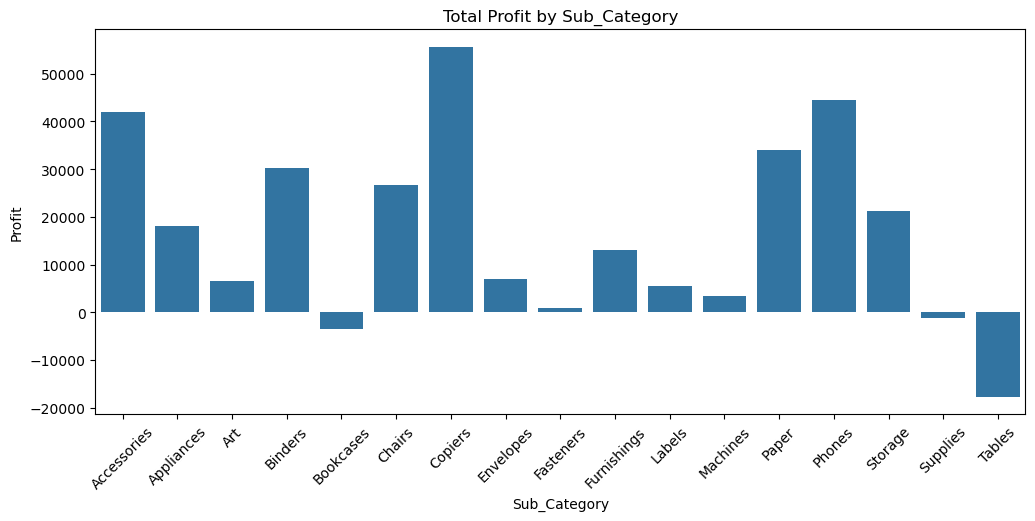

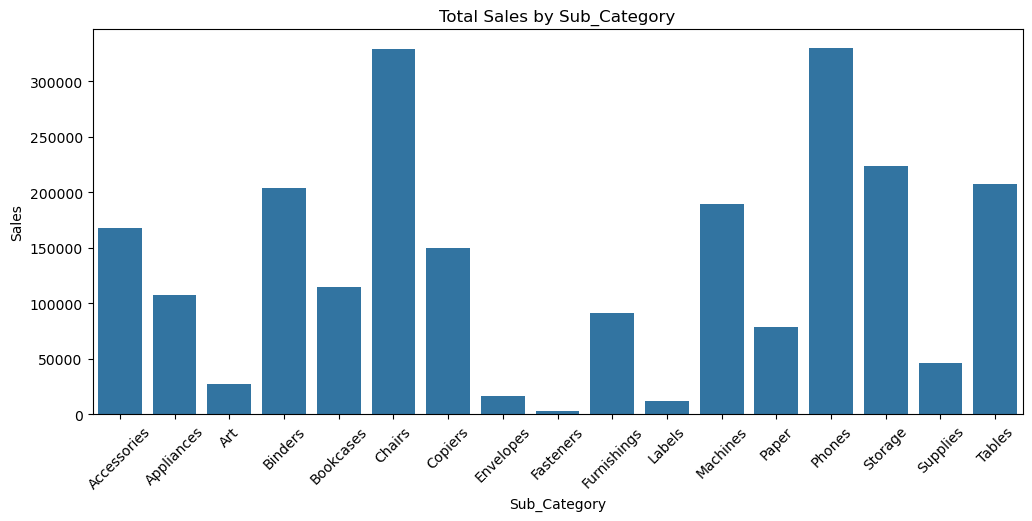

In [21]:
#sub-category performance
subcat_perf = df.groupby("Sub_Category")[["Sales","Profit"]].sum().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x="Sub_Category", y="Profit", data=subcat_perf)
plt.title("Total Profit by Sub_Category")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x="Sub_Category", y="Sales", data=subcat_perf)
plt.title("Total Sales by Sub_Category")
plt.xticks(rotation=45)
plt.show()

## Discounts impact on profit

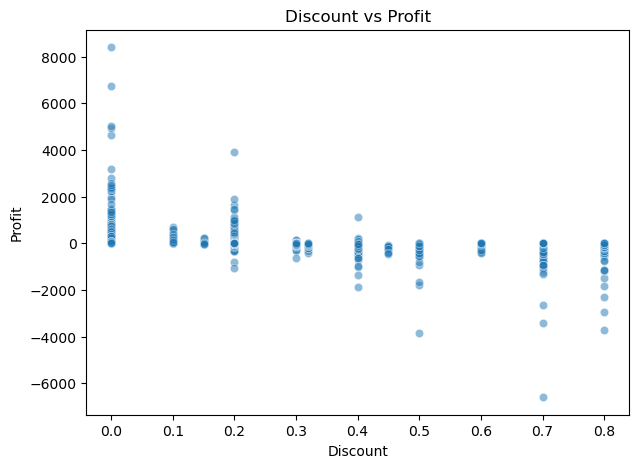

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.5)
plt.title("Discount vs Profit")
plt.show()

## Regional Performance

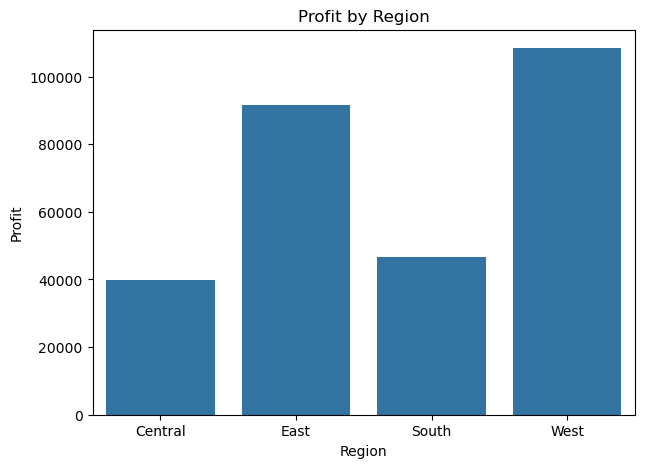

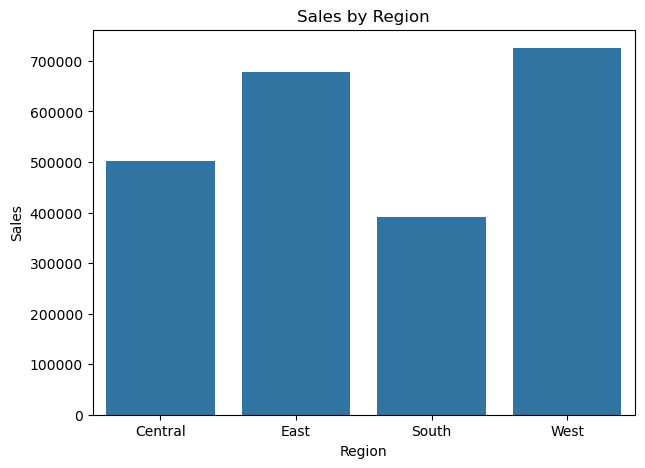

In [23]:
region_perf = df.groupby("Region")[["Sales","Profit"]].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x="Region", y="Profit", data=region_perf)
plt.title("Profit by Region")
plt.show()
plt.figure(figsize=(7,5))
sns.barplot(x="Region", y="Sales", data=region_perf)
plt.title("Sales by Region")
plt.show()

## Aggregate monthly sales

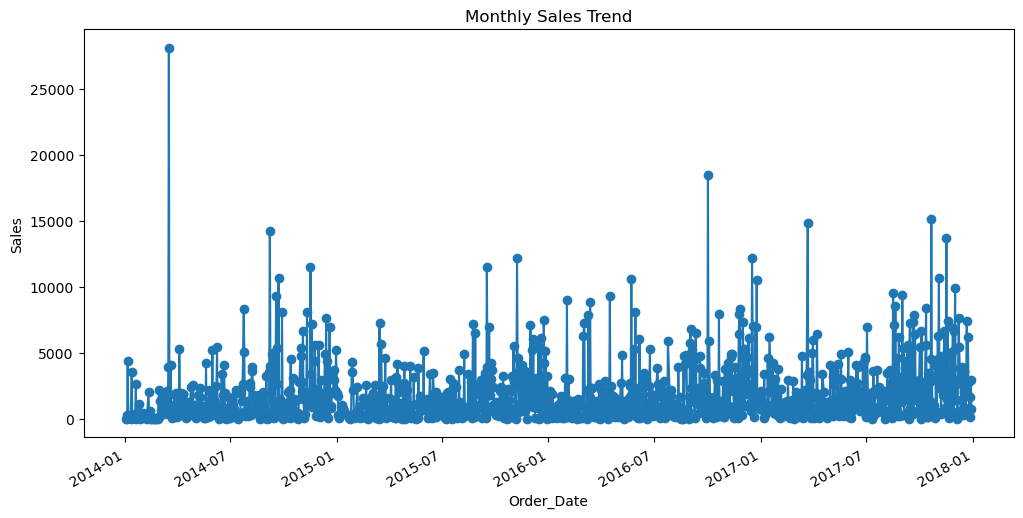

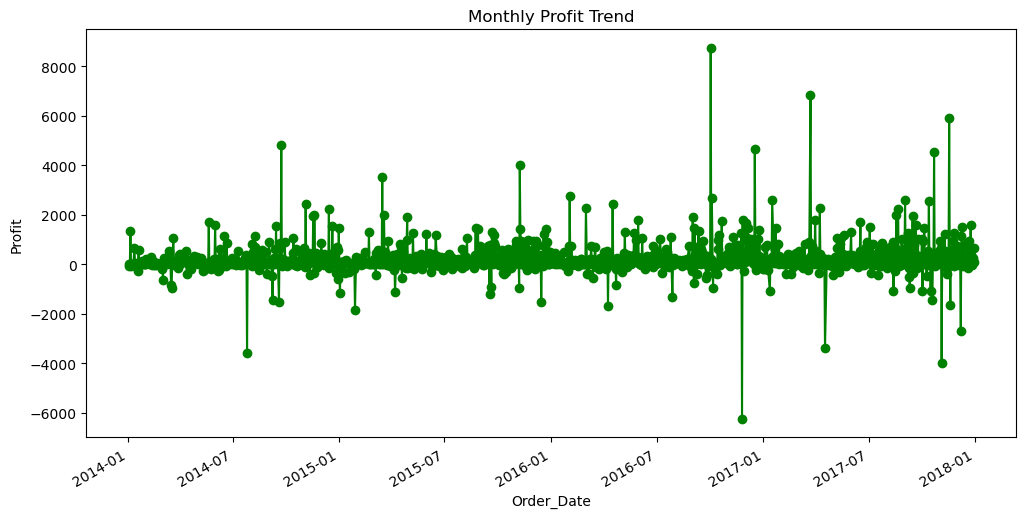

In [25]:
monthly_sales = df.groupby("Order_Date")[["Sales","Profit"]].sum()

plt.figure(figsize=(12,6))
monthly_sales["Sales"].plot(marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()
plt.figure(figsize=(12,6))
monthly_sales["Profit"].plot(marker="o", color="green")
plt.title("Monthly Profit Trend")
plt.ylabel("Profit")
plt.show()


## Boxplots for outliers

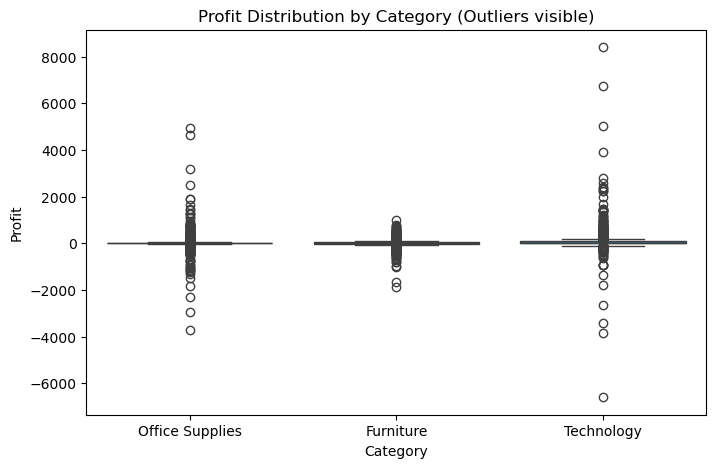

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Profit", data=df)
plt.title("Profit Distribution by Category (Outliers visible)")
plt.show()

## Heatmap Correlation

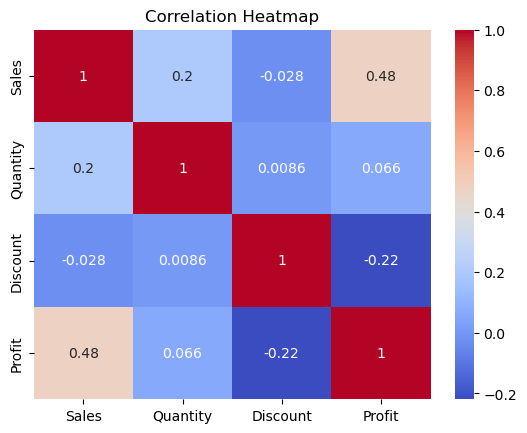

In [27]:
#plt.figure(figsize=(6,4))
sns.heatmap(df[["Sales","Quantity","Discount","Profit"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

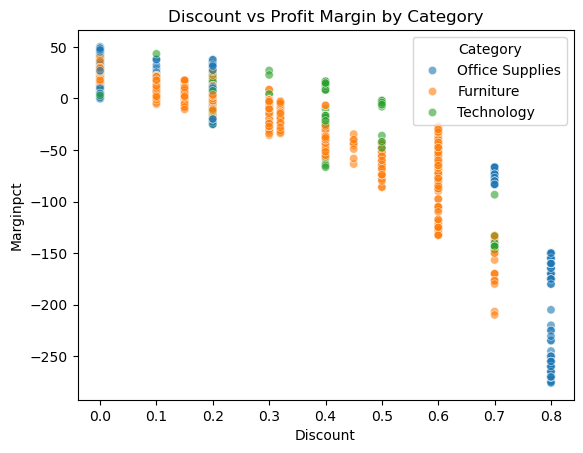

In [ ]:
# profit margin vs discount by category
sns.scatterplot(data=df, x='Discount', y='Marginpct', hue='Category', alpha=0.6)
plt.title('Discount vs Profit Margin by Category')
plt.show()


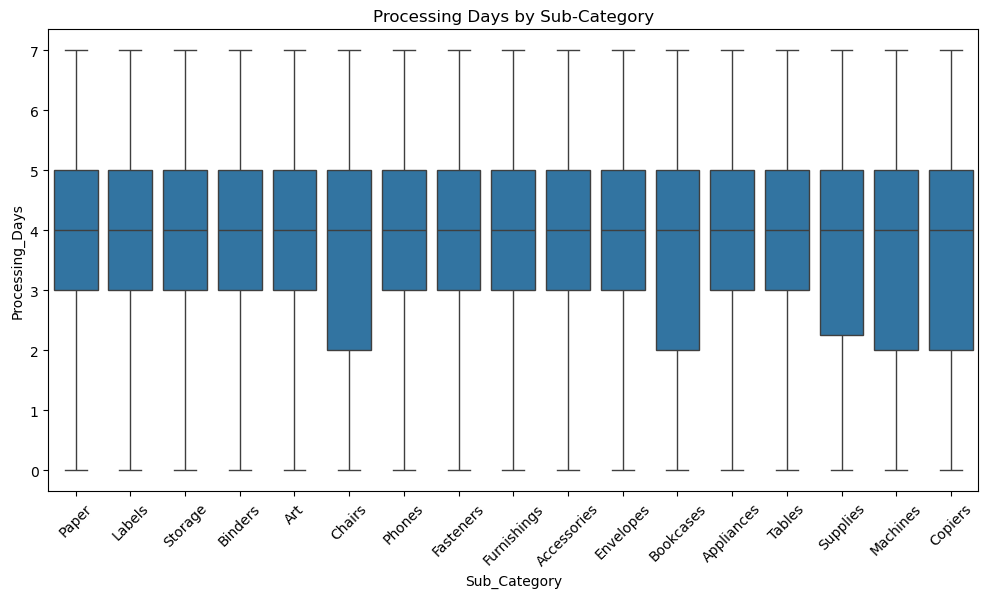

In [36]:
# processing days vs sub category
plt.figure(figsize=(12,6))
sns.boxplot(x='Sub_Category', y='Processing_Days', data=df)
plt.title('Processing Days by Sub-Category')
plt.xticks(rotation=45)
plt.show()